# Development Environment: Evaluating Model Performance

Area 1: Initial functional tests

## Area 1: Initial Functional Tests

Evaluating model basic functionality and results to see where logical improvements need to be made and mistakes were created. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib as mpl
import numpy as np
from matplotlib.lines import Line2D

In [2]:
# Model Results  
data = pd.read_csv('../src/results.tsv', sep = '\t', header=0, index_col = False)

### LR-Data Evaluation:

the following is specifically for evaluating functionality of the Ligand-Receptor Model in SingleCell/tests

/tmp/ipykernel_6792/2097652295.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


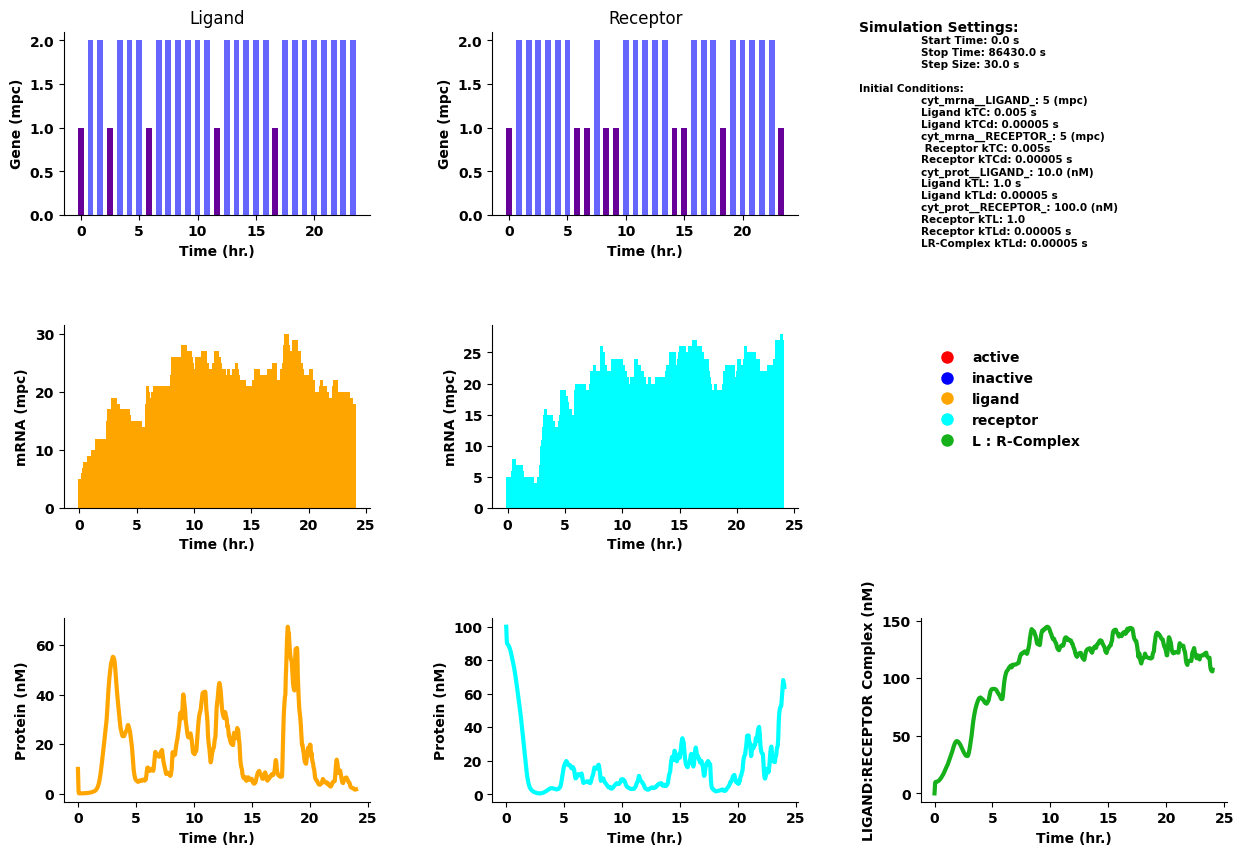

<Figure size 640x480 with 0 Axes>

In [3]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3


stop = len(data.index)* 30.0
step = stop / len(data.index)

time = np.arange(0.0, stop, step)
start = time[0]
cyt_gene_a__ligand_init = data[headers[0]]
cyt_gene_a__receptor_init = data[headers[2]]
cyt_mrna_ligand_init = data[headers[4]][0]
cyt_mrna_receptor_init = data[headers[5]][0]
cyt_prot_ligand_init = data[headers[6]][0]
cyt_prot_receptor_init = data[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, data[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, data[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, data[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, data[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, data[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, data[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, data[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, data[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, data[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, "Ligand kTC: 0.005 s", fontsize=7.5)
ax1_2.text(0.0, 0.8, "Ligand kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, " Receptor kTC: 0.005s", fontsize=7.5)
ax1_2.text(0.0, 0.725, "Receptor kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, "Ligand kTL: 1.0 s", fontsize=7.5)
ax1_2.text(0.0, 0.65, "Ligand kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, "Receptor kTL: 1.0", fontsize=7.5)
ax1_2.text(0.0, 0.575, "Receptor kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.55, "LR-Complex kTLd: 0.00005 s", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.savefig(fname = "/home/jonah/Desktop/sim-results/LR-Model.png", dpi = 300)

## 10-Fold Increase Analysis

Analyzing both cumulative output of 10-fold increase of kTC's, and respective species trajectories

In [4]:
increase = pd.read_csv("../src/increase-10-fold-kTC-results.tsv", sep = '\t', header=0)

/tmp/ipykernel_6792/2796039383.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


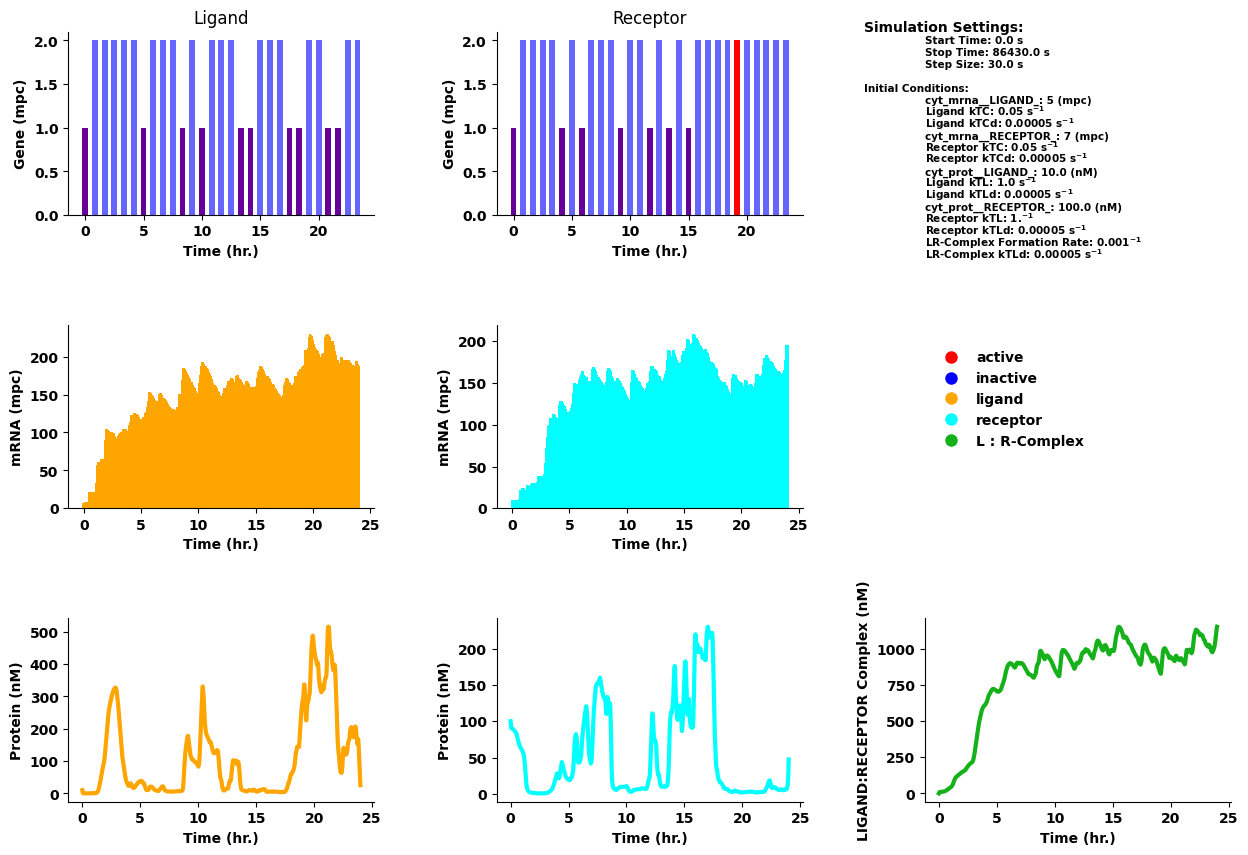

In [9]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3

stop = len(data.index)* 30.0
step = stop / len(data.index)

time = increase["index"]
start = time[0]
cyt_gene_a__ligand_init = increase[headers[0]]
cyt_gene_a__receptor_init = increase[headers[2]]
cyt_mrna_ligand_init = increase[headers[4]][0]
cyt_mrna_receptor_init = increase[headers[5]][0]
cyt_prot_ligand_init = increase[headers[6]][0]
cyt_prot_receptor_init = increase[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, increase[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, increase[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, increase[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, increase[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, increase[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, increase[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, increase[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, increase[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, increase[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, r"Ligand kTC: 0.05 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.8, r"Ligand kTCd: 0.00005 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, r"Receptor kTC: 0.05 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.725, r"Receptor kTCd: 0.00005 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, r"Ligand kTL: 1.0 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.65, r"Ligand kTLd: 0.00005 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, r"Receptor kTL: 1.$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.575, r"Receptor kTLd: 0.00005 s$^{-1}$", fontsize=7.5)
ax1_2.text(0.0,0.55, r"LR-Complex Formation Rate: 0.001$^{-1}$", fontsize=7.5)
ax1_2.text(0.0, 0.525, r"LR-Complex kTLd: 0.00005 s$^{-1}$", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(fname = "/home/jonah/Desktop/sim-results/kTC-x10-LR-Model.png", dpi = 300)
plt.show()

## 10-fold Decrease Analysis 

Transcription birth parameters were set to 10-fold less than the base value of 0.005 s.

In [6]:
decrease = pd.read_csv("../src/decrease-10-fold-kTC-results.tsv", sep = "\t", header=0)

/tmp/ipykernel_6792/3420362859.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


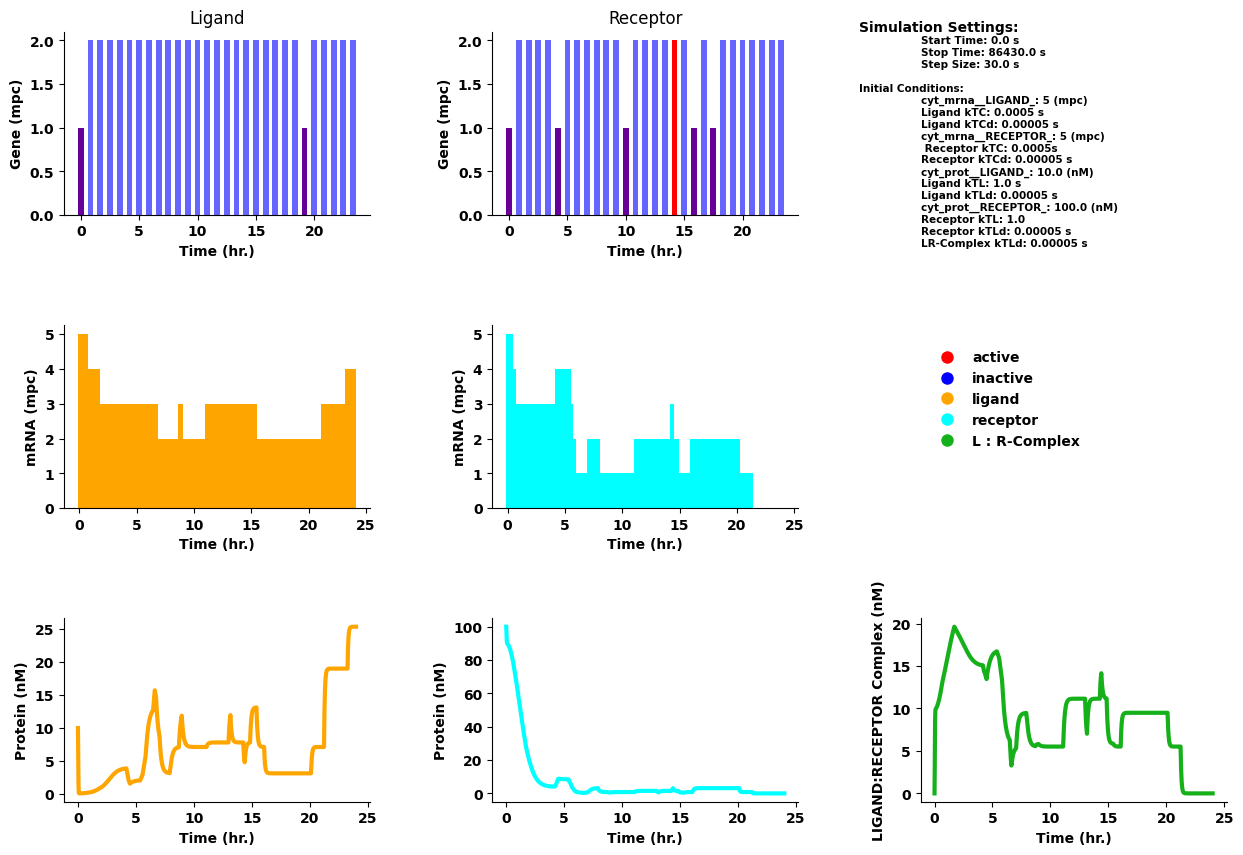

In [7]:
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3

stop = len(data.index)* 30.0
step = stop / len(data.index)

time = increase["index"]
start = time[0]
cyt_gene_a__ligand_init = decrease[headers[0]]
cyt_gene_a__receptor_init = decrease[headers[2]]
cyt_mrna_ligand_init = decrease[headers[4]][0]
cyt_mrna_receptor_init = decrease[headers[5]][0]
cyt_prot_ligand_init = decrease[headers[6]][0]
cyt_prot_receptor_init = decrease[headers[7]][0]

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(time[::100]/3600, decrease[headers[0]][::100], color='red', label=headers[0], width=0.5)
ax1_0.bar(time[::100]/3600, decrease[headers[1]][::100], color='blue', alpha=0.6, label=headers[1], width=0.5)
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene (mpc)")
ax1_0.set_xlabel('Time (hr.)')
# ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(time[::100]/3600, decrease[headers[2]][::100], color='red', label=headers[2], width=0.5)
ax1_1.bar(time[::100]/3600, decrease[headers[3]][::100], color='blue', alpha=0.6, label=headers[3], width=0.5)
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene (mpc)")
ax1_1.set_xlabel('Time (hr.)')
# ax1_1.legend(frameon = False, )

# === Middle row (Single line plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(time/3600, decrease[headers[4]], color='orange', width=0.25)
ax2_0.set_ylabel("mRNA (mpc)")
ax2_0.set_xlabel('Time (hr.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(time/3600, decrease[headers[5]], color='cyan', width=0.25)
ax2_1.set_ylabel("mRNA (mpc)")
ax2_1.set_xlabel('Time (hr.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(time/3600, decrease[headers[6]], color='orange', label=headers[6])
ax3_0.set_ylabel("Protein (nM)")
ax3_0.set_xlabel('Time (hr.)')
ax3_1.plot(time/3600, decrease[headers[7]], color='cyan', label=headers[7])
ax3_1.set_ylabel("Protein (nM)")
ax3_1.set_xlabel('Time (hr.)')
ax3_2.plot(time/3600, decrease[headers[8]], color='#15b01a', label=headers[8])
ax3_2.set_ylabel("LIGAND:RECEPTOR Complex (nM)")
ax3_2.set_xlabel('Time (hr.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2, 1.0, "Simulation Settings: ", fontsize = 10)
ax1_2.text(0.0, 0.975, f"Start Time: {start} s", fontsize =7.5)
ax1_2.text(0.0, 0.95,f"Stop Time: {stop} s", fontsize = 7.5)
ax1_2.text(0.0, 0.925,f"Step Size: {step} s", fontsize = 7.5)

ax1_2.text(-0.2, 0.875, "Initial Conditions:", fontsize=7.5)
ax1_2.text(0.0, 0.85,f"cyt_mrna__LIGAND_: {cyt_mrna_ligand_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.825, "Ligand kTC: 0.0005 s", fontsize=7.5)
ax1_2.text(0.0, 0.8, "Ligand kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.775,f"cyt_mrna__RECEPTOR_: {cyt_mrna_receptor_init} (mpc)", fontsize = 7.5)
ax1_2.text(0.0, 0.75, " Receptor kTC: 0.0005s", fontsize=7.5)
ax1_2.text(0.0, 0.725, "Receptor kTCd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.7, f"cyt_prot__LIGAND_: {cyt_prot_ligand_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.675, "Ligand kTL: 1.0 s", fontsize=7.5)
ax1_2.text(0.0, 0.65, "Ligand kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.625, f"cyt_prot__RECEPTOR_: {cyt_prot_receptor_init} (nM)", fontsize=7.5)
ax1_2.text(0.0, 0.6, "Receptor kTL: 1.0", fontsize=7.5)
ax1_2.text(0.0, 0.575, "Receptor kTLd: 0.00005 s", fontsize=7.5)
ax1_2.text(0.0, 0.55, "LR-Complex kTLd: 0.00005 s", fontsize=7.5)

ax1_2.axis('off')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='active', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='inactive', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='ligand', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='receptor', markerfacecolor='cyan', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='L : R-Complex', markerfacecolor='#15b01a', markersize=10)
]

# Add legend manually to ax1_2
ax1_2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0.10), frameon=False, fontsize=10)


sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(fname = "/home/jonah/Desktop/sim-results/ktC-x0.1-LR-Model.png", dpi = 300)
plt.show()

## Correlation Plot

Analyzing the quotient result of increasing and decreasing transcriptional activation by 10-fold

/home/jonah/Desktop/SingleCell/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


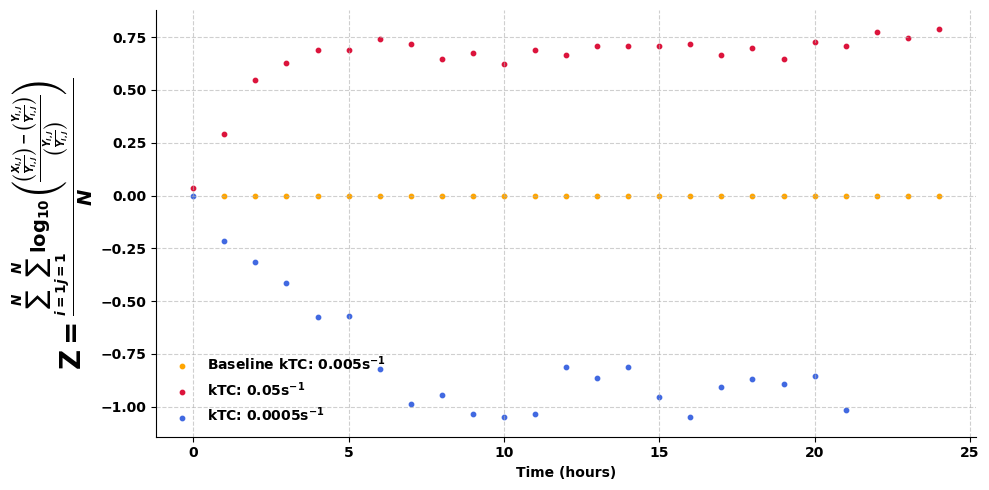

In [8]:
self_matrix = data.iloc[:, 5:10] / data.iloc[5:]
base_level = np.mean(self_matrix - self_matrix, axis=1) # feature-wide mean difference

increase_matrix = increase.iloc[:, 5:10] / data.iloc[:, 5:10]
increase_comparison = np.mean(np.log10(increase_matrix) , axis=1)

decrease_matrix = decrease.iloc[:, 5:10] / data.iloc[:, 5:10]
decrease_comparison = np.mean(np.log10(decrease_matrix), axis=1)

time = data["index"] / 3600.0

# Sampling interval for clarity (every 120th point)
sample_interval = 120
time_sampled = time[::sample_interval]

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(time_sampled, base_level[::sample_interval], color="orange", s=10, label=r"Baseline kTC: 0.005s$^{-1}$")
plt.scatter(time_sampled, increase_comparison[::sample_interval], color="crimson", s=10, label=r"kTC: 0.05s$^{-1}$")
plt.scatter(time_sampled, decrease_comparison[::sample_interval], color="royalblue", s=10, label=r"kTC: 0.0005s$^{-1}$")

legend_str = (
    r"$\mathrm{Z} = \frac{"
    r"\sum_{i=1}^{N} \sum_{j=1}^{N} "
    r"\log_{10} \left( "
        r"\frac{ \left( \frac{X_{i,j}}{Y_{i,j}} \right) - \left( \frac{Y_{i,j}}{Y_{i,j}} \right) }"
              r"{ \left( \frac{Y_{i,j}}{Y_{i,j}} \right) } "
    r"\right)"
    r"}{N}$"
)


plt.xlabel("Time (hours)")
plt.ylabel(legend_str, fontsize = 20)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(frameon=False)
plt.tight_layout()
sns.despine()
plt.savefig("../../sim-results/mean-log-normalized-difference.png", dpi = 300)
plt.show()